<a href="https://colab.research.google.com/github/hansufsm/FisicaIA/blob/main/novos_agentes_esquadrao_fisicaia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Projeto: Agentes IA para Estudantes Universitários
---

#### 💡 Proposta: Sistema Colaborativo de Resolução de Problemas Físicos (Esquadrão Física IA)

**🎯Objetivo**: Criar um sistema de múltiplos agentes que ajuda estudantes a resolver problemas complexos de física, especialmente em eletricidade e magnetismo, com visualização, explicação passo a passo e conexão com aplicações do

### Como Utilizar Este Notebook
O notebook é dividido em blocos de código chamados "células". Você deve executar cada célula de cima para baixo, clicando no ícone ▶️ (play) ao lado dela.


✅ Etapa 1: Instalar as bibliotecas

Clique no botão ▶️ da primeira célula para instalar os pacotes necessários.

✅ Etapa 2: Inserir a sua **API Key**

Ao rodar essa célula, o notebook vai pedir que você cole a sua API Key do Google AI Studio.

Ela é necessária para o agente funcionar.

Se você não tem ainda:

* Vá para Google AI Studio
* Crie sua chave (grátis).
* Copie e cole no campo solicitado.

⚠️ Importante: Nunca cole sua chave direto no código nem compartilhe ela. Este notebook foi feito para usar a chave de forma segura.

✅ Etapa 3: Início da Interação

Assim que a API estiver conectada:

Continue executando Clique no botão ▶️ das célular de códigos seguintes até chegar à célula [Principal](https://colab.research.google.com/drive/1BXuUflNOri4yG8IMimmcQ0tU-O3tX98V#scrollTo=mOsQgUG8SPx6).

Clique no botão ▶️ da célula [Principal](https://colab.research.google.com/drive/1BXuUflNOri4yG8IMimmcQ0tU-O3tX98V#scrollTo=mOsQgUG8SPx6.) para iniciar a conversa

---


In [ ]:
#!pip install google-cloud-aiplatform[agent_engines]==1.88.0  # to resolve session issues

In [5]:
# Esquadrão FisicaIA - Sistema Colaborativo de Resolução de Problemas Físicos
# Desenvolvido por Prof. Hans Rogério Zimermann
# Implementação de 4 agentes especializados usando Gemini API
# Projeto Desafio Imersão alura Maio 2025

# ===== CONFIGURAÇÃO INICIAL =====

# Instalação das bibliotecas necessárias
!pip install -q google-generativeai genai streamlit matplotlib numpy pillow plotly

import os
from google import genai
import json
import time
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import plotly.graph_objects as go
from PIL import Image
import re
import threading
import queue


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.1/831.1 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.36.0 which is incompatible.


In [6]:
from google.colab import userdata
#import os
os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

client = genai.Client()

# Listando os Modelos

#for model in client.models.list():
#  print(model.name)

# Criar uma variável para armazenar o Modelo a ser usado
modelo = "models/gemini-2.0-flash"

In [9]:
# Instalar Framework ADK de agentes do Google ##################################
#!pip install google-cloud-aiplatform[agent_engines]==1.94.0
!pip install -q google-adk==0.5.0 # google-cloud-aiplatform[agent_engines]

# Importar Bibliotecas etc do adk e outras ##################################
from google.adk.agents import Agent
from google.adk.runners import Runner
from google.adk.sessions import InMemorySessionService
from google.adk.tools import google_search
from google.genai import types  # Para criar conteúdos (Content e Part)
from datetime import date
import textwrap # Para formatar melhor a saída de texto
from IPython.display import display, Markdown # Para exibir texto formatado no Colab
import requests # Para fazer requisições HTTP
import warnings

warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.1/334.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0

In [10]:
# Função auxiliar que envia uma mensagem para um agente via Runner e retorna a resposta final
def call_agent(agent: Agent, message_text: str) -> str:
    # Cria um serviço de sessão em memória
    session_service = InMemorySessionService()
    # Cria uma nova sessão (você pode personalizar os IDs conforme necessário)
    session = session_service.create_session(app_name=agent.name, user_id="user1", session_id="session1")
    # Cria um Runner para o agente
    runner = Runner(agent=agent, app_name=agent.name, session_service=session_service)
    # Cria o conteúdo da mensagem de entrada
    content = types.Content(role="user", parts=[types.Part(text=message_text)])

    final_response = ""
    # Itera assincronamente pelos eventos retornados durante a execução do agente
    for event in runner.run(user_id="user1", session_id="session1", new_message=content):
        if event.is_final_response():
          for part in event.content.parts:
            if part.text is not None:
              final_response += part.text
              final_response += "\n"
    return final_response

In [3]:
# Função auxiliar para exibir texto formatado em Markdown no Colab
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [20]:
# Definição dos Agentes

################################################
# --- Agente 1: Interpretador de Problemas --- #
################################################
def agente_interpretador(enunciado):
  interpretador = Agent(
      name="agente_interpretador_de_problemas",
      model="gemini-2.0-flash",
      instruction="""
      Você é um professor universitário com Doutorado em Física e Ensino de Física, especializado em didática para o ensino de ciências.
      Sua função é:
        1. Analisar e interpretar o enunciado do problema
        2. Classificar o tipo de problema dentro da área de conhecimento científico e demonstrar sua relevância para a área e o conhecimento.
        3. Forneçer uma análise cadêmica aprofundada do enunciado, esclarecendo os pontos-chaves e os fundamentos teóricos que embasam a resolução (máximo 2 parágrafos).
        3. Oferecer um embasamento teórico a nivel universitário de no máximo 2 parágrafos.
        4. Listar as equações relevantes para a solução e justificar sua escolha
        3. Identificar os Dados e Extrair todas as variáveis, constantes e unidades mencionadas
        5. Sugerir uma abordagem didática e metodológica para resolver o problema passo a passo

      Use o formato latex quando envolver expressões matemáticas. Quando for o caso ou possível, jamais usando equações inline, sempre em nova linha..

      Destaque claramente qual o propósito do exercício, quais os resultados esperados e o impacto na compreensão dos conceitos físicos, a partir do ponto de vista da modelagem e da visualização gráfica.
      Seja conciso e assertivo na definição dos objetivos.
      """,
      description="Interpretador de Problemas sobre o tópico indicado",
      tools=[google_search]
  )

  entrada_do_agente_interpretador = f"Tópico: {enunciado}\n"
  # Executa o agente
  interpretacao_do_problema = call_agent(interpretador, entrada_do_agente_interpretador)
  return interpretacao_do_problema

################################################
# --- Agente 2: Interpretador de Problemas --- #
################################################
# O Agente Solucionador desenvolve a solução matemática

def agente_solucionador(enunciado):
    solucionador = Agent(
        name="agente_solucionador",
        model="gemini-2.0-flash",
        # Inserir as instruções do Agente Planejador #################################################
        # Definição do papel do solucionador
        instruction="""
        Você é um professor universitário com Doutorado em Física e Ensino de Física,
        especialista em didática para o ensino de ciências e um Agente exímio Solucionador Matemático especializado em física e educação matemática e física.

        Sua função é:
        1. Desenvolver a solução matemática passo a passo fornecida pela bordagem didática e metodológica fornecida pelo agente anterior
        2. Realizar todos os cálculos e manipulações algébricas necessárias passo a passo explicando para o estudante o que está sendo feito.
        3. Verificar as unidades e consistência dimensional
        4. Fornecer o resultado final com unidades corretas no SI.

        Seja claro e detalhado, garantindo que o estudante obtenha informações completas para a compreensão do problema.
        """,
        description="Agente solucionador",
        tools=[google_search]
    )

    entrada_do_agente_solucionador = f"\n\nEnunciado: {enunciado}\n"
    # Executa o agente
    plano_de_solucao = call_agent(solucionador, entrada_do_agente_solucionador)
    return plano_de_solucao

################################################
# --- Agente 3: Visualizador de problemas  --- #
################################################
# O Agente Visualizador cria representações visuais

def agente_visualizador(enunciado):
    visualizador = Agent(
        name="agente_visualizador",
        model="gemini-2.0-flash",
        # Inserir as instruções do Agente Planejador #################################################
        # Definição do papel do solucionador
        instruction="""
        Você é um professor universitário com Doutorado em Física e Ensino de Física,
        especializado em didática para o ensino de ciências.

        Sua função é:
        1. Gerar até 3 gráficos para visualização dos resultados.
        2. Gerar instruções de esquemas .excalidraw para o estudante montar diagramas de apoio ao seus estudo
        1. Criar representações visuais do problema (diagramas de circuitos, gráficos esquemas, campos, etc.)
        2. Gerar gráficos interativos para visualizar relações entre variáveis
        3. Produzir animações simples para demonstrar conceitos dinâmicos
        4. Adaptar visualizações para diferentes estilos de aprendizagem
        5. Gerar código Python (dentro de caixa de código que facilita copiar e colar) para criar diagramas, gráficos ou visualizações relevantes
        6. Adaptar as visualizações ao tipo específico de problema
        7. Garantir que as visualizações sejam claras e informativas

        Formate sua resposta com blocos de código Python executáveis usando matplotlib, plotly ou outras bibliotecas.

        Para cada visualização, forneça:
          1. Uma descrição do que está sendo visualizado
          2. Formate o código python com syntaxhighlight
          2. O código Python completo para gerar a visualização (dentro de caixa de código ou de texto que facilita copiar e colar)
          3. Uma explicação de como interpretar a visualização

        Se houver restrição na geração de gráficos, forneça o código em Python (dentro de caixa de código que facilita copiar e colar) correspondente para
        que os gráficos possam ser gerados posteriormente.
        Organize a explicação de forma que o material seja resumido e apto para
        ser salvo em formato markdown ou PDF, com as explicações claras e profissionais.
        """,
        description="Agente visualizador",
        tools=[google_search]
    )

    entrada_do_agente_visualizador = f"\nVisualização: {enunciado}\n"
    # Executa o agente
    plano_de_visualizacao = call_agent(visualizador, entrada_do_agente_visualizador)
    return plano_de_visualizacao

################################################
# --- Agente 3: Visualizador de problemas  --- #
################################################
# O Agente Contextualizador adiciona aplicações práticas

def agente_contextualizador(enunciado):
    contextualizador = Agent(
        name="agente_contextualizador",
        model="gemini-2.0-flash",
        # Inserir as instruções do Agente Planejador #################################################
        # Definição do papel do contextualizador:
        # * Conecta o problema a aplicações do mundo real
        # * Fornece exemplos de tecnologias relacionadas
        # * Sugere experimentos práticos que os estudantes podem realizar
        # * Relaciona o problema com outros tópicos da física
        instruction="""
          Você é um professor universitário com Doutorado em Física e Ensino de Física, especialista
          em didática para o ensino de ciências. A partir do material elaborado. Use formato Latex sepre que for necessário.

          Sua função é:
          1. Apresentar o contexto do problema, explicando como tais conceitos da física estão presentes no cotidiano
          2. revisar o conteúdo apresentado, validando a clareza, a coerência e a completude da abordagem metodológica
          3. Finalizar o material com uma sessão que inclua:
            a) Recursos Educativos:
                - Um conjunto de exercícios práticos que o estudante possa realizar para validar seu entendimento
                - Sugerir pelo menos três links para aprofundamento, hospedados em universidades federais, com foco em qualidade e clareza
                - Propor um vídeo de qualidade que complemente o aprendizado, escolhendo fontes confiáveis e reconhecidas.

            b) Exercícios Desafiadores:
              - Propor um exercício de fácil para universitários (linguagem vetorial se possível) e outro desafiador, com soluções comentadas quando possível para feedback imediato
              - Propor um exercício de difícil e outro desafiador, sem a solução, apenas com dicas quando possível para feedback posterior
            c) Uma conclusão composta por dois parágrafos:
              I) O primeiro, com tom sóbrio e técnico, ressaltando a importância da modelagem e dos gráficos na compreensão dos problemas de física
              II) O segundo, motivador e encorajador, instigando o estudante a aprofundar seus estudos na área abordada
          4. Adicionar emojis antes dos principais tópicos e títulos para enfatizar os pontos importantes se for o caso
          5. Certificar-se de que o material contenha todas as referências bibliográficas acadêmicas relevantes que fundamentem o conteúdo
          6. Formatar o conteúdo de forma a ser impresso ou salvo digitalmente (markdown ou PDF), Adicione emojis pertinente antes dos títulos relevantes

          Por fim, esteja atento às oportunidades de aprimorar o conteúdo conforme o feedback dos estudantes.
        """,
        description="Agente contextualizador",
        tools=[google_search]
    )




    entrada_do_agente_contextualizador = f"\nContexto: {enunciado}\n"
    # Executa o agente
    plano_de_contexto = call_agent(contextualizador, entrada_do_agente_contextualizador)
    return plano_de_contexto


In [ ]:
#- Mapa mental em Excalidraw (.excalidraw)
#          - Mapa mental em Mermaid (.mermaid)
#          - Slides em Excalidraw (.excalidraw)
#          - Slides em PowerPoint (.pptx)
#          - Lista de exercícios com gabarito em PDF (.pdf)
#          - Slides didáticos com o passo a passo do problema;

# Principal

In [21]:
print("### 🚀 Iniciando o Sistema Colaborativo de Resolução de Problemas Físicos com 4 Agentes (🤖 - Esquadrão Física IA)")
print()

# --- Obter o Enunciado do problema ---
enunciado = ""
enunciado = input("Digite o enunciado do problema: ")
#enunciado = input("Exemplo de enunciado: Qual é o campo elétrico a 0.2 m de uma carga de 2 μC?<br>\n")
# Um circuito elétrico contém uma bateria de 12V e um resistor de 4 ohms. Qual é a corrente no circuito?
# Um projétil é lançado a partir de uma plataforma a uma altura de 50 metros do solo com uma velocidade inicial de 30 m/s, formando um ângulo de 40° com a horizontal. qualo alcançe do projétil?

# Inserir lógica do sistema de agentes ################################################

if not enunciado:
  print("Por favor informe um enunciado!")
else:
  display(to_markdown("## 👏 Ótimo! "))
  print(f"Vamos resolver juntos: - {enunciado}")

# Dicas:
# Qual é o campo elétrico a 0.2 m de uma carga de 2 μC?
#

  # alimenta o Agente 1 - agente_interpretador() com o problema (topico)
  problema_fisica = agente_interpretador(enunciado)
  print("\n")
  display(to_markdown("*--- Resposta do **Agente 1**: 🤖(Interpretador) ---*"))
  display(to_markdown(problema_fisica))
  print("-----------------------------------------------")

  # alimenta o Agente 2 - agente_solucionador() com a resposta do Agente 1 (problema_fisica)
  plano_de_solucao = agente_solucionador(problema_fisica)
  print("\n")
  display(to_markdown("*--- Resposta do **Agente 2**: 🤖(Solucionador) ---*"))
  display(to_markdown(plano_de_solucao))

  # alimenta o Agente 3 - agente_visualizador() com a resposta do Agente 2 (plano_de_solucao)
  plano_de_visualizacao = agente_visualizador(plano_de_solucao)
  print("\n")
  display(to_markdown("*--- Resposta do **Agente 3**: 🤖(Visualizador) ---*"))
  display(to_markdown(plano_de_visualizacao))

  # alimenta o Agente 4 - agente_contextualizador() com a resposta do Agente 1 (problema_fisica)
  plano_de_contexto = agente_contextualizador(problema_fisica)
  print("\n")
  display(to_markdown("*--- Resposta do **Agente 4**: 🤖(contextualizador) ---*"))
  display(to_markdown("### 🌍 Contextualização e Aplicações:\n"))
  display(to_markdown(plano_de_contexto))

  display(to_markdown("----\n"))


### 🚀 Iniciando o Sistema Colaborativo de Resolução de Problemas Físicos com 4 Agentes (🤖 - Esquadrão Física IA)

Digite o enunciado do problema: Durante uma aula de Educação Física, um professor desafia os alunos: ‘Quão longe pode ir uma bola de tênis se for lançada com uma velocidade inicial de 30 m/s, formando um ângulo de 60° com a horizontal?. Calcule o alcance da bola.


> ## 👏 Ótimo! 

Vamos resolver juntos: - Durante uma aula de Educação Física, um professor desafia os alunos: ‘Quão longe pode ir uma bola de tênis se for lançada com uma velocidade inicial de 30 m/s, formando um ângulo de 60° com a horizontal?. Calcule o alcance da bola.




> *--- Resposta do **Agente 1**: 🤖(Interpretador) ---*

> Olá! Vejamos este problema interessante de lançamento de projéteis. Analisarei o problema e fornecer as informações necessárias para resolvê-lo.
> 
> **1. Análise e Interpretação do Problema:**
> 
> O problema descreve um cenário clássico de lançamento de projétil, onde uma bola de tênis é lançada com uma velocidade inicial e um ângulo em relação à horizontal. O objetivo é determinar o alcance horizontal da bola, ou seja, a distância que ela percorre na horizontal antes de atingir o solo. Este é um problema fundamental da cinemática, que combina conceitos de movimento uniforme e movimento uniformemente variado. A resolução envolve a decomposição da velocidade inicial em componentes horizontal e vertical, a análise do movimento vertical para determinar o tempo de voo, e o uso desse tempo para calcular o alcance horizontal.
> 
> **2. Classificação do Problema e Relevância:**
> 
> Este problema se enquadra na área da mecânica, especificamente na cinemática, que estuda o movimento dos corpos sem considerar as causas desse movimento. Ele é relevante porque:
> 
> *   **Aplicações Práticas:** Modelos de lançamento de projéteis são usados em diversas áreas, como esportes (tênis, futebol, golfe), balística, e até mesmo no planejamento de trajetórias de robôs.
> *   **Compreensão de Conceitos Físicos:** A resolução deste problema ajuda a consolidar o entendimento de conceitos como velocidade, aceleração, decomposição de vetores, movimento uniforme, movimento uniformemente variado e a independência dos movimentos horizontal e vertical.
> *   **Desenvolvimento de Habilidades:** A resolução exige a aplicação de princípios físicos, a manipulação de equações matemáticas e a interpretação de resultados, habilidades essenciais na formação em ciências e engenharia.
> 
> **3. Análise Acadêmica Aprofundada:**
> 
> O problema pode ser analisado sob a ótica da cinemática bidimensional, onde o movimento do projétil é decomposto em duas componentes independentes: horizontal e vertical. A componente horizontal da velocidade permanece constante ao longo do movimento (desprezando a resistência do ar), enquanto a componente vertical varia devido à ação da gravidade.
> 
> O ponto chave para a resolução é entender que o tempo que a bola permanece no ar (tempo de voo) é determinado exclusivamente pelo movimento vertical. Durante esse tempo, a bola se desloca horizontalmente com velocidade constante, permitindo calcular o alcance. A trajetória do projétil é uma parábola, e o alcance máximo é obtido quando o ângulo de lançamento é de 45 graus (em condições ideais, sem resistência do ar).
> 
> **4. Embasamento Teórico:**
> 
> O movimento de um projétil é uma combinação de dois movimentos independentes:
> 
> *   **Movimento Horizontal:** É um movimento uniforme, descrito pela equação:
>     $$x = x_0 + v_{0x} \cdot t$$
>     onde \( x \) é a posição horizontal, \( x_0 \) é a posição inicial, \( v_{0x} \) é a componente horizontal da velocidade inicial e \( t \) é o tempo.
> 
> *   **Movimento Vertical:** É um movimento uniformemente variado, descrito pelas equações:
>     $$y = y_0 + v_{0y} \cdot t - \frac{1}{2} \cdot g \cdot t^2$$
>     $$v_y = v_{0y} - g \cdot t$$
>     onde \( y \) é a posição vertical, \( y_0 \) é a posição inicial, \( v_{0y} \) é a componente vertical da velocidade inicial, \( g \) é a aceleração da gravidade e \( t \) é o tempo.
> 
> A trajetória do projétil é uma parábola, resultado da combinação desses dois movimentos.
> 
> **5. Equações Relevantes:**
> 
> 1.  **Decomposição da velocidade inicial:**
>     $$v_{0x} = v_0 \cdot \cos(\theta)$$
>     $$v_{0y} = v_0 \cdot \sin(\theta)$$
>     onde \( v_0 \) é a velocidade inicial e \( \theta \) é o ângulo de lançamento.
> 2.  **Tempo de voo (T):** O tempo total que o projétil permanece no ar, pode ser encontrado através da análise do movimento vertical. No ponto mais alto da trajetória, a velocidade vertical é zero. Usando a equação da velocidade vertical:
>     $$0 = v_{0y} - g \cdot \frac{T}{2}$$
>     $$T = \frac{2 \cdot v_{0y}}{g} = \frac{2 \cdot v_0 \cdot \sin(\theta)}{g}$$
> 3.  **Alcance (A):** O alcance horizontal é a distância percorrida pelo projétil durante o tempo de voo:
>     $$A = v_{0x} \cdot T = v_0 \cdot \cos(\theta) \cdot \frac{2 \cdot v_0 \cdot \sin(\theta)}{g} = \frac{v_0^2 \cdot \sin(2\theta)}{g}$$
> 
> **Justificativa das Equações:**
> 
> *   As equações de decomposição da velocidade são necessárias para analisar o movimento em suas componentes horizontal e vertical.
> *   A equação do tempo de voo é crucial para determinar quanto tempo o projétil permanece no ar, influenciando diretamente o alcance.
> *   A equação do alcance é o objetivo final, permitindo calcular a distância horizontal percorrida pelo projétil.
> 
> **6. Dados e Variáveis:**
> 
> *   **Velocidade inicial (\( v_0 \)):** 30 m/s
> *   **Ângulo de lançamento (\( \theta \)):** 60°
> *   **Aceleração da gravidade (\( g \)):** Aproximadamente 9.8 m/s² (valor padrão)
> *   **Alcance (A):** Variável a ser calculada
> 
> **7. Abordagem Didática e Metodológica:**
> 
> 1.  **Introdução:** Comece revisando os conceitos de movimento uniforme e movimento uniformemente variado. Explique como a velocidade pode ser decomposta em componentes horizontal e vertical.
> 2.  **Discussão Teórica:** Apresente as equações do movimento de projéteis, explicando como elas são derivadas das leis da cinemática. Enfatize a independência dos movimentos horizontal e vertical.
> 3.  **Resolução do Problema:**
>     *   Calcule as componentes horizontal e vertical da velocidade inicial.
>     *   Calcule o tempo de voo usando a componente vertical da velocidade inicial e a aceleração da gravidade.
>     *   Calcule o alcance horizontal usando a componente horizontal da velocidade inicial e o tempo de voo.
> 4.  **Discussão dos Resultados:** Analise o resultado obtido, discutindo como o alcance varia com o ângulo de lançamento e a velocidade inicial. Explore cenários hipotéticos com diferentes valores.
> 5.  **Visualização Gráfica:** Utilize um software de simulação ou uma planilha para visualizar a trajetória do projétil. Isso ajudará os alunos a entenderem melhor o movimento e a relação entre as variáveis.
> 
> **Propósito do Exercício e Resultados Esperados:**
> 
> *   **Propósito:** O objetivo deste exercício é aplicar os conceitos de cinemática para modelar e analisar o movimento de um projétil, calculando seu alcance horizontal.
> *   **Resultados Esperados:** Espera-se que os alunos sejam capazes de decompor a velocidade inicial, calcular o tempo de voo, aplicar as equações do movimento uniformemente variado, e determinar o alcance do projétil. Além disso, espera-se que eles compreendam a relação entre o ângulo de lançamento, a velocidade inicial e o alcance, bem como a importância da modelagem e visualização gráfica na compreensão dos conceitos físicos.
> *   **Impacto na Compreensão:** A resolução deste problema ajuda a consolidar o entendimento dos conceitos de cinemática, a desenvolver habilidades de resolução de problemas e a apreciar a aplicação da física em situações do mundo real.
> 
> Espero que esta análise detalhada seja útil! Se precisar de mais alguma coisa, é só perguntar.


-----------------------------------------------




> *--- Resposta do **Agente 2**: 🤖(Solucionador) ---*

> Com certeza! Com base na análise detalhada e nas equações relevantes que você forneceu, vou apresentar a solução matemática passo a passo para calcular o alcance horizontal da bola de tênis.
> 
> **1. Decomposição da Velocidade Inicial:**
> 
> *   Componente horizontal:
>     $$v_{0x} = v_0 \cdot \cos(\theta) = 30 \, \text{m/s} \cdot \cos(60^\circ) = 30 \, \text{m/s} \cdot 0.5 = 15 \, \text{m/s}$$
> *   Componente vertical:
>     $$v_{0y} = v_0 \cdot \sin(\theta) = 30 \, \text{m/s} \cdot \sin(60^\circ) = 30 \, \text{m/s} \cdot \frac{\sqrt{3}}{2} \approx 30 \, \text{m/s} \cdot 0.866 = 25.98 \, \text{m/s}$$
> 
> **2. Cálculo do Tempo de Voo (T):**
> 
> $$T = \frac{2 \cdot v_{0y}}{g} = \frac{2 \cdot 25.98 \, \text{m/s}}{9.8 \, \text{m/s}^2} \approx \frac{51.96 \, \text{m/s}}{9.8 \, \text{m/s}^2} \approx 5.30 \, \text{s}$$
> 
> **3. Cálculo do Alcance (A):**
> 
> $$A = v_{0x} \cdot T = 15 \, \text{m/s} \cdot 5.30 \, \text{s} \approx 79.5 \, \text{m}$$
> 
> **Resultado Final:**
> 
> O alcance horizontal da bola de tênis é de aproximadamente \( 79.5 \, \text{metros} \).
> 
> **Unidades e Consistência Dimensional:**
> 
> *   Velocidade (\( v_0, v_{0x}, v_{0y} \)): m/s (metros por segundo)
> *   Ângulo (\( \theta \)): graus (°)
> *   Aceleração da gravidade (\( g \)): m/s² (metros por segundo ao quadrado)
> *   Tempo (\( T \)): s (segundos)
> *   Alcance (\( A \)): m (metros)
> 
> A consistência dimensional é verificada ao longo dos cálculos, garantindo que as unidades se combinem corretamente para produzir o resultado final em metros.
> 


> *--- Resposta do **Agente 3**: 🤖(Visualizador) ---*

> Para facilitar a compreensão e o estudo do problema do lançamento oblíquo, apresento visualizações e diagramas que ajudarão a internalizar os conceitos e a solução passo a passo.
> 
> ### 1. Gráfico da Trajetória da Bola de Tênis
> 
> Este gráfico mostra a trajetória da bola de tênis ao longo do tempo, destacando o alcance horizontal máximo.
> 
> 
> ```python
> import numpy as np
> import matplotlib.pyplot as plt
> 
> # Dados do problema
> v0 = 30  # m/s
> theta = 60  # graus
> g = 9.8  # m/s^2
> 
> # Conversão do ângulo para radianos
> theta_rad = np.radians(theta)
> 
> # Componentes da velocidade inicial
> v0x = v0 * np.cos(theta_rad)
> v0y = v0 * np.sin(theta_rad)
> 
> # Tempo de voo
> T = (2 * v0y) / g
> 
> # Alcance horizontal
> A = v0x * T
> 
> # Criação do vetor tempo
> t = np.linspace(0, T, 100)
> 
> # Cálculos da posição em função do tempo
> x = v0x * t
> y = v0y * t - 0.5 * g * t**2
> 
> # Plotagem do gráfico
> plt.figure(figsize=(10, 6))
> plt.plot(x, y)
> plt.title('Trajetória da Bola de Tênis')
> plt.xlabel('Alcance Horizontal (m)')
> plt.ylabel('Altura (m)')
> plt.grid(True)
> plt.annotate(f'Alcance = {A:.2f} m', xy=(A, 0), xytext=(A-20, 10),
>              arrowprops=dict(facecolor='black', shrink=0.05))
> plt.show()
> ```
> 
> 
> **Descrição:**
> 
> *   O gráfico ilustra a trajetória parabólica da bola de tênis.
> *   O eixo x representa o alcance horizontal, e o eixo y representa a altura.
> *   A anotação indica o alcance máximo calculado.
> 
> **Como Interpretar:**
> 
> *   O ponto mais alto da parábola representa a altura máxima que a bola atinge.
> *   O ponto onde a parábola intercepta o eixo x é o alcance horizontal total.
> *   A forma da parábola demonstra como a gravidade afeta a trajetória da bola ao longo do tempo.
> 
> ### 2. Diagrama de Excalidraw para Decomposição da Velocidade
> 
> Este diagrama mostra a decomposição vetorial da velocidade inicial em suas componentes horizontal e vertical.
> 
> 
> ```excalidraw
> {
>   "type": "excalidraw",
>   "version": 2,
>   "source": "https://excalidraw.com",
>   "elements": [
>     {
>       "type": "arrow",
>       "version": 120,
>       "x": 50,
>       "y": 200,
>       "x1": 50,
>       "y1": 200,
>       "x2": 250,
>       "y2": 200,
>       "strokeColor": "#000000",
>       "backgroundColor": "transparent",
>       "fillStyle": "hachure",
>       "strokeWidth": 2,
>       "strokeStyle": "solid",
>       "roughness": 1,
>       "opacity": 100,
>       "groupIds": [],
>       "strokeSharpness": "round",
>       "seed": 123,
>       "roundness": null,
>       "startBinding": null,
>       "endBinding": null,
>       "updated": 1622587200000
>     },
>     {
>       "type": "arrow",
>       "version": 121,
>       "x": 50,
>       "y": 200,
>       "x1": 50,
>       "y1": 200,
>       "x2": 50,
>       "y2": 50,
>       "strokeColor": "#000000",
>       "backgroundColor": "transparent",
>       "fillStyle": "hachure",
>       "strokeWidth": 2,
>       "strokeStyle": "solid",
>       "roughness": 1,
>       "opacity": 100,
>       "groupIds": [],
>       "strokeSharpness": "round",
>       "seed": 124,
>       "roundness": null,
>       "startBinding": null,
>       "endBinding": null,
>       "updated": 1622587200000
>     },
>     {
>       "type": "arrow",
>       "version": 122,
>       "x": 50,
>       "y": 200,
>       "x1": 50,
>       "y1": 200,
>       "x2": 300,
>       "y2": 50,
>       "strokeColor": "#000000",
>       "backgroundColor": "transparent",
>       "fillStyle": "hachure",
>       "strokeWidth": 2,
>       "strokeStyle": "solid",
>       "roughness": 1,
>       "opacity": 100,
>       "groupIds": [],
>       "strokeSharpness": "round",
>       "seed": 125,
>       "roundness": null,
>       "startBinding": null,
>       "endBinding": null,
>       "updated": 1622587200000
>     },
>     {
>       "type": "text",
>       "version": 123,
>       "x": 260,
>       "y": 185,
>       "width": 40,
>       "height": 25,
>       "angle": 0,
>       "strokeColor": "#000000",
>       "backgroundColor": "transparent",
>       "fillStyle": "hachure",
>       "strokeWidth": 1,
>       "strokeStyle": "solid",
>       "roughness": 1,
>       "opacity": 100,
>       "groupIds": [],
>       "strokeSharpness": "sharp",
>       "seed": 126,
>       "fontFamily": 1,
>       "fontSize": 20,
>       "text": "v₀ₓ",
>       "rawText": "v₀ₓ",
>       "textAlign": "left",
>       "verticalAlign": "top",
>       "baseline": 18,
>       "containerId": null,
>       "originalText": "v₀ₓ",
>       "updated": 1622587200000
>     },
>     {
>       "type": "text",
>       "version": 124,
>       "x": 10,
>       "y": 20,
>       "width": 40,
>       "height": 25,
>       "angle": 0,
>       "strokeColor": "#000000",
>       "backgroundColor": "transparent",
>       "fillStyle": "hachure",
>       "strokeWidth": 1,
>       "strokeStyle": "solid",
>       "roughness": 1,
>       "opacity": 100,
>       "groupIds": [],
>       "strokeSharpness": "sharp",
>       "seed": 127,
>       "fontFamily": 1,
>       "fontSize": 20,
>       "text": "v₀y",
>       "rawText": "v₀y",
>       "textAlign": "left",
>       "verticalAlign": "top",
>       "baseline": 18,
>       "containerId": null,
>       "originalText": "v₀y",
>       "updated": 1622587200000
>     },
>     {
>       "type": "text",
>       "version": 125,
>       "x": 310,
>       "y": 30,
>       "width": 40,
>       "height": 25,
>       "angle": 0,
>       "strokeColor": "#000000",
>       "backgroundColor": "transparent",
>       "fillStyle": "hachure",
>       "strokeWidth": 1,
>       "strokeStyle": "solid",
>       "roughness": 1,
>       "opacity": 100,
>       "groupIds": [],
>       "strokeSharpness": "sharp",
>       "seed": 128,
>       "fontFamily": 1,
>       "fontSize": 20,
>       "text": "v₀",
>       "rawText": "v₀",
>       "textAlign": "left",
>       "verticalAlign": "top",
>       "baseline": 18,
>       "containerId": null,
>       "originalText": "v₀",
>       "updated": 1622587200000
>     },
>     {
>       "type": "line",
>       "version": 126,
>       "x": 50,
>       "y": 50,
>       "x1": 300,
>       "y1": 50,
>       "x2": 300,
>       "y2": 50,
>       "strokeColor": "#000000",
>       "backgroundColor": "transparent",
>       "fillStyle": "hachure",
>       "strokeWidth": 1,
>       "strokeStyle": "solid",
>       "roughness": 1,
>       "opacity": 100,
>       "groupIds": [],
>       "strokeSharpness": "round",
>       "seed": 129,
>       "roundness": null,
>       "startBinding": null,
>       "endBinding": null,
>       "updated": 1622587200000
>     },
>     {
>       "type": "line",
>       "version": 127,
>       "x": 300,
>       "y": 50,
>       "x1": 300,
>       "y1": 50,
>       "x2": 300,
>       "y2": 200,
>       "strokeColor": "#000000",
>       "backgroundColor": "transparent",
>       "fillStyle": "hachure",
>       "strokeWidth": 1,
>       "strokeStyle": "solid",
>       "roughness": 1,
>       "opacity": 100,
>       "groupIds": [],
>       "strokeSharpness": "round",
>       "seed": 130,
>       "roundness": null,
>       "startBinding": null,
>       "endBinding": null,
>       "updated": 1622587200000
>     }
>   ],
>   "appState": {
>     "gridSize": null,
>     "viewBackgroundColor": "#ffffff"
>   },
>   "files": {}
> }
> ```
> 
> 
> **Instruções para o Diagrama:**
> 
> 1.  **Vetor Velocidade Inicial (\(v_0\)):** Desenhe um vetor inclinado a 60 graus em relação à horizontal, representando a velocidade inicial da bola.
> 2.  **Componente Horizontal (\(v_{0x}\)):** Desenhe um vetor horizontal partindo da origem até o ponto onde a perpendicular do vetor \(v_0\) encontra o eixo horizontal.
> 3.  **Componente Vertical (\(v_{0y}\)):** Desenhe um vetor vertical partindo da origem até o ponto onde a perpendicular do vetor \(v_0\) encontra o eixo vertical.
> 4.  **Ângulo (\(\theta\)):** Indique o ângulo de 60 graus entre o vetor \(v_0\) e o eixo horizontal.
> 
> **Como Interpretar:**
> 
> *   Este diagrama ilustra como a velocidade inicial \(v_0\) é decomposta em duas componentes que atuam independentemente.
> *   \(v_{0x}\) é responsável pelo movimento horizontal, que é uniforme.
> *   \(v_{0y}\) é responsável pelo movimento vertical, que é influenciado pela gravidade.
> 
> ### 3. Gráfico da Altura em Função do Tempo
> 
> Este gráfico mostra como a altura da bola de tênis varia ao longo do tempo.
> 
> 
> ```python
> import numpy as np
> import matplotlib.pyplot as plt
> 
> # Dados do problema
> v0 = 30  # m/s
> theta = 60  # graus
> g = 9.8  # m/s^2
> 
> # Conversão do ângulo para radianos
> theta_rad = np.radians(theta)
> 
> # Componente vertical da velocidade inicial
> v0y = v0 * np.sin(theta_rad)
> 
> # Tempo de voo
> T = (2 * v0y) / g
> 
> # Criação do vetor tempo
> t = np.linspace(0, T, 100)
> 
> # Cálculo da altura em função do tempo
> y = v0y * t - 0.5 * g * t**2
> 
> # Plotagem do gráfico
> plt.figure(figsize=(10, 6))
> plt.plot(t, y)
> plt.title('Altura da Bola de Tênis em Função do Tempo')
> plt.xlabel('Tempo (s)')
> plt.ylabel('Altura (m)')
> plt.grid(True)
> 
> # Encontrar o tempo e a altura máxima
> t_max = T / 2
> y_max = v0y * t_max - 0.5 * g * t_max**2
> plt.annotate(f'Altura Máxima = {y_max:.2f} m', xy=(t_max, y_max), xytext=(t_max-1, y_max-5),
>              arrowprops=dict(facecolor='black', shrink=0.05))
> 
> plt.show()
> ```
> 
> 
> **Descrição:**
> 
> *   O gráfico mostra a variação da altura da bola de tênis ao longo do tempo.
> *   O eixo x representa o tempo, e o eixo y representa a altura.
> *   A anotação indica a altura máxima atingida e o tempo em que ela é atingida.
> 
> **Como Interpretar:**
> 
> *   A altura aumenta até atingir um ponto máximo e, em seguida, diminui devido à ação da gravidade.
> *   O tempo no ponto máximo representa o momento em que a bola atinge sua altura máxima.
> *   Este gráfico ajuda a visualizar a influência da gravidade no movimento vertical da bola.
> 
> ### Adaptações para Diferentes Estilos de Aprendizagem
> 
> *   **Visual:** Os gráficos fornecem uma representação visual da trajetória e das variáveis envolvidas.
> *   **Lógico:** As equações e os cálculos passo a passo oferecem uma abordagem lógica para entender o problema.
> *   **Interativo:** Os alunos podem modificar os parâmetros no código Python para ver como diferentes valores afetam a trajetória e o alcance da bola.
> 
> Essas visualizações e diagramas são projetados para fornecer uma compreensão abrangente e intuitiva do problema do lançamento oblíquo, facilitando o aprendizado e a internalização dos conceitos.


> *--- Resposta do **Agente 4**: 🤖(contextualizador) ---*

> ### 🌍 Contextualização e Aplicações:


> Olá! 👋 Que análise completa e detalhada sobre o problema de lançamento de projéteis! É notável como você abordou desde os conceitos básicos até as aplicações práticas, passando pela fundamentação teórica e metodológica. Vamos refinar ainda mais esse material para torná-lo ainda mais útil e atraente para estudantes de física.
> 
> ### 🎾 Contextualização e Relevância
> 
> Antes de mergulharmos nas equações, é crucial destacar como o lançamento de projéteis está presente em nosso cotidiano.
> 
> *   🏀 **Esportes:** Cada vez que um jogador de basquete arremessa a bola à cesta, ele está, intuitivamente, aplicando os princípios do lançamento de projéteis. A trajetória, a velocidade inicial e o ângulo são todos ajustados para acertar o alvo.
> *   🎯 **Engenharia:** Na engenharia civil, o cálculo do alcance de um jato de água em sistemas de irrigação ou a trajetória de materiais em construção são exemplos práticos do uso desses conceitos.
> *   🚀 **Militar:** Na balística, a trajetória de um projétil é rigorosamente calculada para garantir a precisão do alvo, levando em consideração fatores como a resistência do ar e a gravidade.
> 
> ### 🔬 Revisão do Conteúdo Apresentado
> 
> A clareza e a coerência da sua abordagem são pontos fortes. No entanto, podemos adicionar alguns detalhes para enriquecer a explicação:
> 
> *   **Resistência do Ar:** Mencionar que, em situações ideais, a resistência do ar é desprezada, mas que em casos reais ela pode influenciar significativamente a trajetória do projétil. Isso adiciona uma camada de complexidade e realismo ao problema.
> *   **Efeitos da Rotação:** Em alguns esportes, como o tênis e o golfe, a rotação da bola (efeito Magnus) pode alterar a trajetória. Uma breve menção a esse efeito pode despertar a curiosidade dos alunos.
> *   **Conservação de Energia:** Relacionar o problema do lançamento de projéteis com o princípio da conservação de energia. A energia cinética inicial é convertida em energia potencial gravitacional no ponto mais alto da trajetória, e vice-versa.
> 
> ### 📚 Recursos Educativos Adicionais
> 
> Para enriquecer ainda mais o material, vamos adicionar alguns recursos educativos que podem auxiliar no aprendizado dos alunos.
> 
> #### Exercícios Práticos
> 
> 1.  **Calculando o Alcance:**
>     Um jogador de golfe golpeia uma bola com uma velocidade inicial de 40 m/s, formando um ângulo de 30° com a horizontal. Desprezando a resistência do ar, calcule o alcance horizontal da bola.
> 
>     *Solução:*
> 
>     *   \( v_{0x} = v_0 \cdot \cos(\theta) = 40 \cdot \cos(30°) \approx 34.64 \, \text{m/s} \)
>     *   \( v_{0y} = v_0 \cdot \sin(\theta) = 40 \cdot \sin(30°) = 20 \, \text{m/s} \)
>     *   \( T = \frac{2 \cdot v_{0y}}{g} = \frac{2 \cdot 20}{9.8} \approx 4.08 \, \text{s} \)
>     *   \( A = v_{0x} \cdot T = 34.64 \cdot 4.08 \approx 141.3 \, \text{m} \)
> 2.  **Ângulo de Lançamento Ótimo:**
>     Um canhão lança um projétil com uma velocidade inicial de 50 m/s. Determine o ângulo de lançamento que maximiza o alcance horizontal do projétil.
> 
>     *Solução:*
>     O alcance máximo ocorre quando \( \sin(2\theta) = 1 \), ou seja, \( 2\theta = 90° \). Portanto, \( \theta = 45° \).
> 3.  **Altura Máxima:**
>     Uma bola de beisebol é lançada com uma velocidade inicial de 25 m/s e um ângulo de 45° com a horizontal. Calcule a altura máxima atingida pela bola.
> 
>     *Solução:*
> 
>     *   \( v_{0y} = v_0 \cdot \sin(\theta) = 25 \cdot \sin(45°) \approx 17.68 \, \text{m/s} \)
>     *   No ponto mais alto, \( v_y = 0 \). Usando \( v_y = v_{0y} - g \cdot t \):
>         \( 0 = 17.68 - 9.8 \cdot t \)
>         \( t \approx 1.8 \, \text{s} \)
>     *   \( y = y_0 + v_{0y} \cdot t - \frac{1}{2} \cdot g \cdot t^2 \)
>         \( y = 0 + 17.68 \cdot 1.8 - \frac{1}{2} \cdot 9.8 \cdot (1.8)^2 \approx 15.9 \, \text{m} \)
> 
> #### 🔗 Links para Aprofundamento
> 
> 1.  **Simulações Interativas de Lançamento de Projéteis - Universidade do Estado do Rio de Janeiro (UERJ):**
>     Explore simulações que permitem variar parâmetros como ângulo e velocidade inicial, visualizando o impacto na trajetória.
>     [Simulações Interativas UERJ](https://www.if.uerj.br/)
> 2. **Experimentos Virtuais de Física - Universidade Federal do Rio Grande do Sul (UFRGS):**
>     A UFRGS disponibiliza experimentos virtuais que ajudam a visualizar e entender os conceitos de lançamento de projéteis.
>     [Experimentos Virtuais UFRGS](https://www.ufrgs.br/)
> 
> #### 📹 Vídeos Educativos
> 
> 1.  **Lançamento Oblíquo – Física Total:**
>     Um vídeo do canal Física Total que explica de forma clara e didática o lançamento oblíquo, abordando desde os conceitos básicos até a resolução de exercícios.
>     [Lançamento Oblíquo – Física Total](https://www.youtube.com/FisicaTotal)
> 
> ### 🎯 Exercícios Desafiadores
> 
> #### Exercícios de nível universitário
> 
> 1.  **Fácil:** Um projétil é lançado do solo com velocidade inicial \( \vec{v_0} = (20\hat{i} + 30\hat{j}) \, \text{m/s} \). Determine:
>     a) O tempo total de voo do projétil.
>     b) O alcance horizontal.
>     c) A altura máxima atingida.
> 
>     *Solução:*
>     a) O tempo total de voo é determinado pela componente vertical da velocidade:
>     \[ T = \frac{2v_{0y}}{g} = \frac{2 \cdot 30}{9.8} \approx 6.12 \, \text{s} \]
>     b) O alcance horizontal é dado por:
>     \[ A = v_{0x} \cdot T = 20 \cdot 6.12 \approx 122.4 \, \text{m} \]
>     c) A altura máxima é alcançada quando \( v_y = 0 \), então:
>     \[ H = \frac{v_{0y}^2}{2g} = \frac{30^2}{2 \cdot 9.8} \approx 45.92 \, \text{m} \]
> 
> 2.  **Desafiador:** Um projétil é lançado com velocidade inicial \( v_0 \) e ângulo \( \theta \) em relação à horizontal. Considere que o projétil atinge um alvo que está a uma altura \( h \) acima do ponto de lançamento. Mostre que o alcance horizontal \( x \) é dado por:
>     \[ x = \frac{v_0^2 \cos(\theta)}{g} \left( \sin(\theta) + \sqrt{\sin^2(\theta) - \frac{2gh}{v_0^2}} \right) \]
> 
> #### Exercícios avançados (sem solução imediata, com dicas)
> 
> 1.  **Difícil:** Um projétil é lançado do topo de uma colina com ângulo \( \theta \) em relação à horizontal. A colina faz um ângulo \( \phi \) com a horizontal. Determine o alcance do projétil medido ao longo da colina.
>     *Dica:* Use um sistema de coordenadas inclinado para facilitar a análise.
> 2.  **Desafiador:** Considere um projétil lançado em um meio com resistência do ar proporcional à velocidade. Determine as equações do movimento e analise como a resistência do ar afeta o alcance e a trajetória do projétil.
>     *Dica:* As equações diferenciais resultantes podem ser resolvidas numericamente.
> 
> ### 🎯 Conclusão
> 
> A modelagem matemática e a representação gráfica são ferramentas indispensáveis na física. Elas nos permitem transformar problemas complexos em modelos compreensíveis, facilitando a análise e a interpretação dos fenômenos físicos. Ao visualizar a trajetória de um projétil, por exemplo, podemos entender melhor a influência de variáveis como a velocidade inicial, o ângulo de lançamento e a gravidade.
> 
> O estudo do lançamento de projéteis é uma porta de entrada para a física e a engenharia. Ao dominar os conceitos e as técnicas apresentadas, você estará preparado para enfrentar desafios mais complexos e aprofundar seus conhecimentos em áreas como a mecânica, a balística e a dinâmica de fluidos. Explore, experimente e não tenha medo de errar. A física é uma jornada fascinante, e cada problema resolvido é um passo em direção a uma compreensão mais profunda do universo.
> 
> Espero que essas sugestões adicionais enriqueçam ainda mais o seu material! Se precisar de mais alguma coisa, estou à disposição. 😊
> 


> ----


# Suplementos Gerados

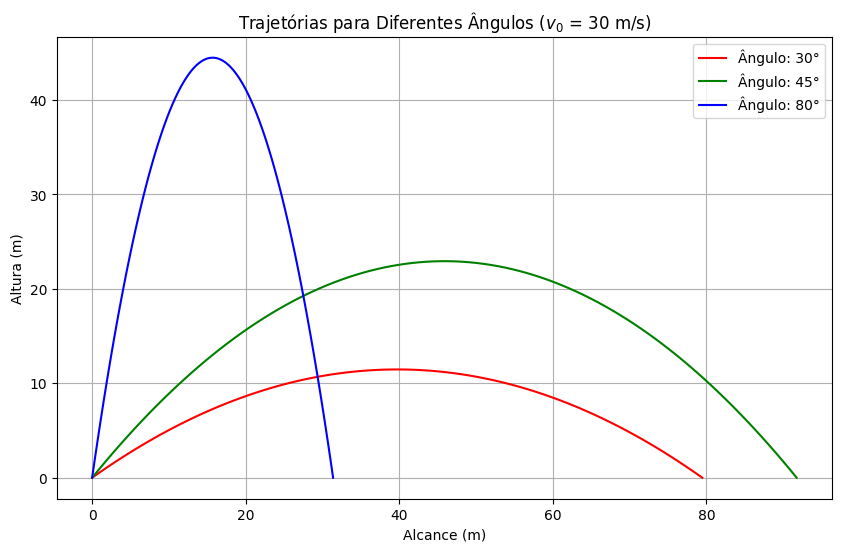

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def trajetoria(v0, theta, g=9.81):
    theta_rad = np.deg2rad(theta)
    tempo = 2 * v0 * np.sin(theta_rad) / g
    t = np.linspace(0, tempo, 100)
    x = v0 * np.cos(theta_rad) * t
    y = v0 * np.sin(theta_rad) * t - 0.5 * g * t**2
    return x, y

v0 = 30
angulos = [30, 45, 80]
cores = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
for angulo, cor in zip(angulos, cores):
    x, y = trajetoria(v0, angulo)
    plt.plot(x, y, label=f'Ângulo: {angulo}°', color=cor)

plt.title('Trajetórias para Diferentes Ângulos ($v_0$ = 30 m/s)')
plt.xlabel('Alcance (m)')
plt.ylabel('Altura (m)')
plt.legend()
plt.grid()
plt.show()


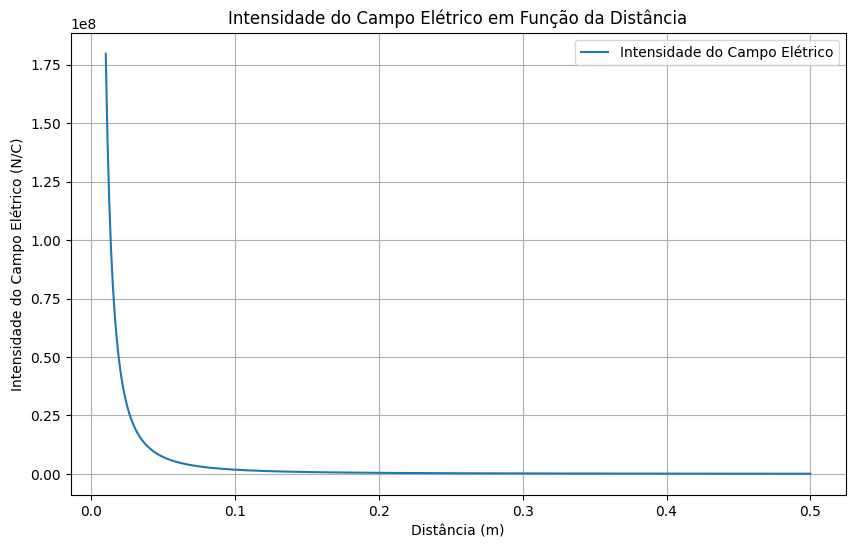

In [ ]:
 #1 Gráfico da intensidade do campo elétrico em função da distância:
 #Este gráfico mostrará como a intensidade do campo elétrico varia com a distância da carga.
 import numpy as np
 import matplotlib.pyplot as plt

 # Constantes
 k = 8.9875e9  # N m^2/C^2
 q = 2e-6      # C


 # 1. Gráfico da intensidade do campo elétrico em função da distância
 def electric_field_strength(r):
  """Calcula a intensidade do campo elétrico a uma distância r."""
  return k * abs(q) / r**2


 distances = np.linspace(0.01, 0.5, 400)  # Distâncias de 0.01 a 0.5 metros
 field_strengths = electric_field_strength(distances)


 plt.figure(figsize=(10, 6))
 plt.plot(distances, field_strengths, label='Intensidade do Campo Elétrico')
 plt.xlabel('Distância (m)')
 plt.ylabel('Intensidade do Campo Elétrico (N/C)')
 plt.title('Intensidade do Campo Elétrico em Função da Distância')
 plt.grid(True)
 plt.legend()
 plt.show()


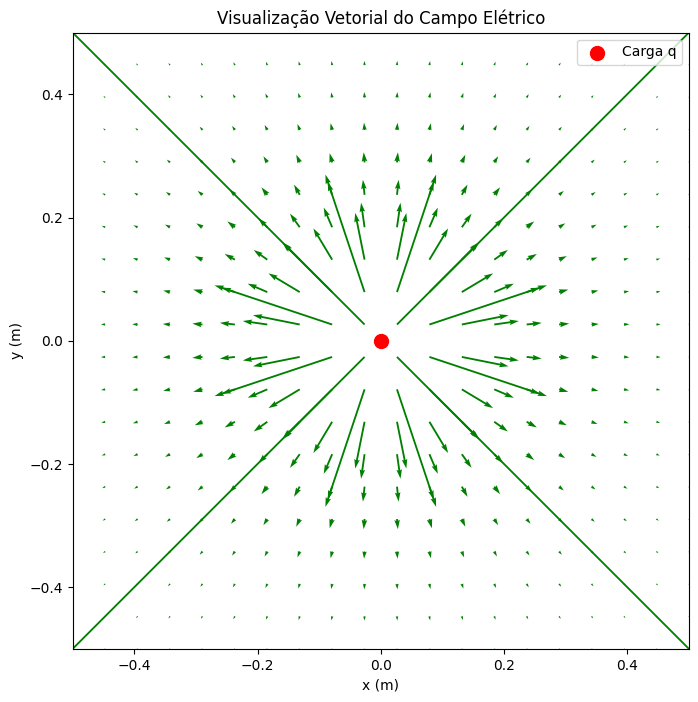

In [ ]:
 # 2 Visualização vetorial do campo elétrico:
 # Usaremos setas para representar a direção e a intensidade do campo elétrico em diferentes pontos ao redor da carga.
 # 2. Visualização vetorial do campo elétrico
 def electric_field_vector(x, y, q_pos=(0, 0)):
  """Calcula o vetor do campo elétrico no ponto (x, y) devido a uma carga em q_pos."""
  r = np.sqrt((x - q_pos[0])**2 + (y - q_pos[1])**2)
  Ex = k * q * (x - q_pos[0]) / r**3
  Ey = k * q * (y - q_pos[1]) / r**3
  return Ex, Ey


 x, y = np.meshgrid(np.linspace(-0.5, 0.5, 20), np.linspace(-0.5, 0.5, 20))
 Ex, Ey = electric_field_vector(x, y)


 plt.figure(figsize=(8, 8))
 plt.quiver(x, y, Ex, Ey, angles='xy', scale_units='xy', color='g')
 plt.xlabel('x (m)')
 plt.ylabel('y (m)')
 plt.title('Visualização Vetorial do Campo Elétrico')
 plt.scatter(0, 0, color='red', marker='o', s=100, label='Carga q')
 plt.legend()
 plt.xlim(-0.5, 0.5)
 plt.ylim(-0.5, 0.5)
 plt.gca().set_aspect('equal', adjustable='box')
 plt.show()


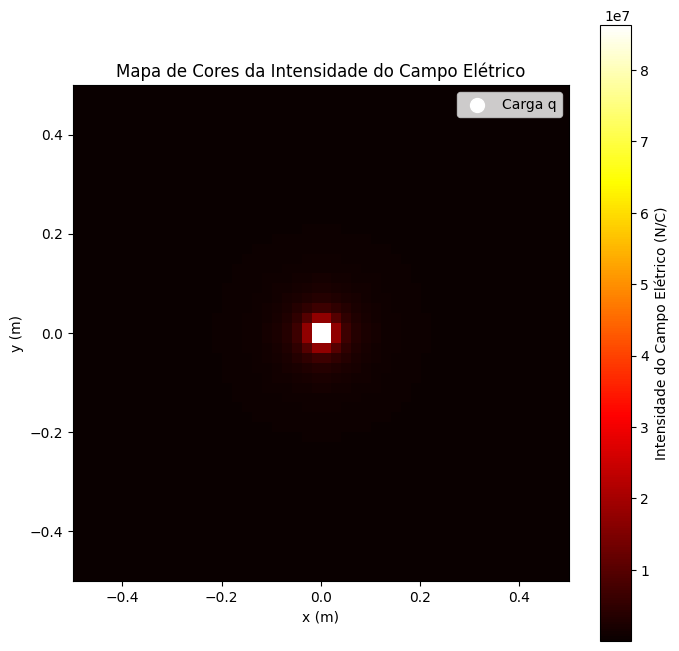

In [ ]:
 # Mapa de cores da intensidade do campo elétrico:
 # Um mapa de cores que mostra a intensidade do campo elétrico em diferentes regiões ao redor da carga.
 # 3. Mapa de cores da intensidade do campo elétrico
 def electric_field_magnitude(x, y, q_pos=(0, 0)):
  """Calcula a magnitude do campo elétrico no ponto (x, y)."""
  r = np.sqrt((x - q_pos[0])**2 + (y - q_pos[1])**2)
  return k * abs(q) / r**2


 x, y = np.meshgrid(np.linspace(-0.5, 0.5, 35), np.linspace(-0.5, 0.5, 35))
 E_magnitude = electric_field_magnitude(x, y)


 plt.figure(figsize=(8, 8))
 plt.imshow(E_magnitude, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap='hot')
 plt.colorbar(label='Intensidade do Campo Elétrico (N/C)')
 plt.xlabel('x (m)')
 plt.ylabel('y (m)')
 plt.title('Mapa de Cores da Intensidade do Campo Elétrico')
 plt.scatter(0, 0, color='white', marker='o', s=100, label='Carga q')
 plt.legend()
 plt.gca().set_aspect('equal', adjustable='box')
 plt.show()

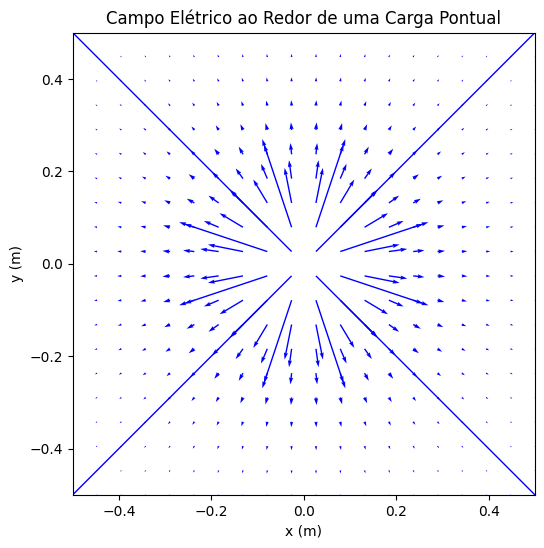

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt

 # Constantes
 k = 9e9  # N.m^2/C^2
 q = 2e-6 # C
 # Espaço para cálculo do campo
 x, y = np.meshgrid(np.linspace(-0.5, 0.5, 20), np.linspace(-0.5, 0.5, 20))

 #Cálculo da distância de cada ponto à carga
 r = np.sqrt(x**2 + y**2)

 # Cálculo do campo elétrico (componentes x e y)
 Ex = k * q * x / r**3
 Ey = k * q * y / r**3

 # Plotagem do campo elétrico
 plt.figure(figsize=(6, 6))
 plt.quiver(x, y, Ex, Ey, color='b')
 plt.xlabel('x (m)')
 plt.ylabel('y (m)')
 plt.title('Campo Elétrico ao Redor de uma Carga Pontual')
 plt.xlim(-0.5, 0.5)
 plt.ylim(-0.5, 0.5)
 plt.gca().set_aspect('equal', adjustable='box')
 plt.show()

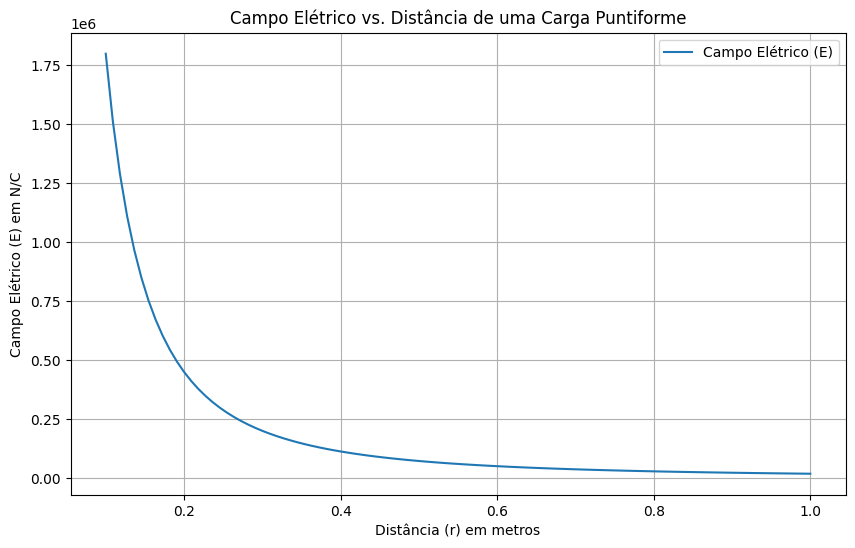

In [ ]:
 import matplotlib.pyplot as plt
 import numpy as np


 # Constantes
 k = 8.99e9  # N.m^2/C^2
 q = 2e-6  # C


 # Distâncias
 r = np.linspace(0.1, 1, 100)  # de 0.1m a 1m


 # Calcula o campo elétrico
 E = k * q / (r**2)


 # Cria o gráfico
 plt.figure(figsize=(10, 6))
 plt.plot(r, E, label='Campo Elétrico (E)')
 plt.xlabel('Distância (r) em metros')
 plt.ylabel('Campo Elétrico (E) em N/C')
 plt.title('Campo Elétrico vs. Distância de uma Carga Puntiforme')
 plt.grid(True)
 plt.legend()
 plt.show()

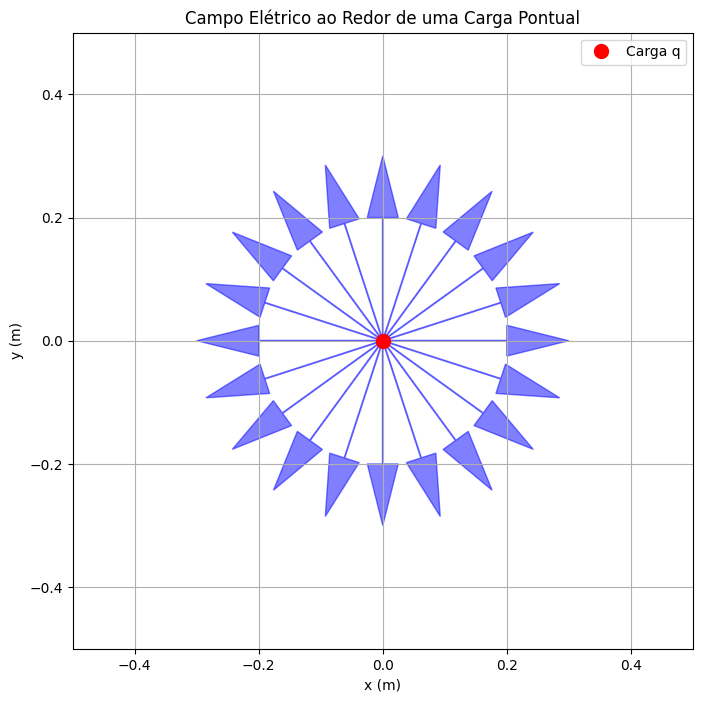

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
k = 8.9875e9  # N m^2/C^2
q = 2e-6      # C
r = 0.2       # m
E = 449375    # N/C (calculado)

# Criação do gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Desenha a carga no centro
ax.plot(0, 0, 'ro', markersize=10, label='Carga q')

# Cria vetores de campo elétrico
num_arrows = 20
for i in range(num_arrows):
    theta = 2 * np.pi * i / num_arrows
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Normaliza o vetor para um tamanho visualmente agradável
    scale = 0.1
    dx = scale * np.cos(theta)
    dy = scale * np.sin(theta)

    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.1, fc='blue', ec='blue', alpha=0.5)

# Configurações do gráfico
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Campo Elétrico ao Redor de uma Carga Pontual')
ax.grid(True)
ax.legend()

plt.show()

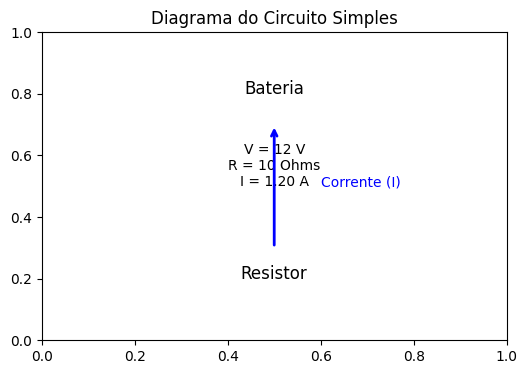

In [ ]:
 import matplotlib.pyplot as plt


 # Dados do circuito
 tensao = 12  # Volts
 resistencia = 10  # Ohms


 # Calcula a corrente usando a Lei de Ohm
 corrente = tensao / resistencia


 # Desenha o diagrama do circuito
 fig, ax = plt.subplots(figsize=(6, 4))
 ax.set_title("Diagrama do Circuito Simples")
 ax.text(0.5, 0.8, "Bateria", ha='center', fontsize=12)
 ax.text(0.5, 0.2, "Resistor", ha='center', fontsize=12)
 ax.text(0.5, 0.5, f"V = {tensao} V\nR = {resistencia} Ohms\nI = {corrente:.2f} A", ha='center', fontsize=10)
 ax.annotate("", xy=(0.5, 0.7), xytext=(0.5, 0.3), arrowprops=dict(arrowstyle="->", color='blue', lw=2))
 ax.text(0.6, 0.5, "Corrente (I)", color='blue', fontsize=10)


 # Remove os eixos
 #ax.axis('off')


 plt.show()